In [1]:
#Here I will look at the model drift for temperature and salinity. Taking a global weighted average for each year
#will have to create these yearly averages first
from __future__ import division, print_function

import netCDF4 as nc
import numpy as np

import numpy.ma as ma
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import glob
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
from mpl_toolkits import basemap
import warnings
from exceptions import KeyError
from netCDF4 import Dataset
%matplotlib inline

In [2]:
def yravg(path, var,year,grid,mask, kappa=False, path2 = None ):
    '''
    Calculates 4 year averages for a given variable
    path, var, grid (gridT, nsquare), are strings
    startyr is int 2002-2012
    '''
        
    avg_var = np.zeros((50,800,544),dtype=float)
    count = 0
          
    filename = glob.glob(path+'y'+str(year)+'m??d??_'+grid+'.nc')

    for f in np.arange(0,len(filename)):
        tracer = nc.Dataset(filename[f])
        variable = tracer.variables[var]
            
        if variable.ndim > 3:
            variable = variable[0,:,:,:]
                
        avg_var[:,:,:] = avg_var[:,:,:]+variable[:,:,:]
        count += 1
            
    avg = count*np.ones((50,800,544))
    print(avg_var[4,100:150,250])
    avg_var = ma.array(avg_var/avg,mask=(mask-1)*-1)
    print(avg_var[4,100:150,250])
    nrows = 800
    ncols = 544
    nvert = 50
    
    if path2 != None:
        netfile = Dataset(path2+str(year)+'avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
        print(path2+str(year)+'avg_'+var+'.nc')
    else:
        netfile = Dataset(path+str(year)+'avg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
        print(path+str(year)+'avg_'+var+'.nc')
    
    netfile.createDimension('x', nrows)
    netfile.createDimension('y', ncols)
    netfile.createDimension('z', nvert)
    new_var = netfile.createVariable(var+'four', 'f8', ('z','x', 'y'))
    new_var[:,:,:] = avg_var[:,:,:]
    netfile.close()
    
    return avg_var


In [3]:
#state locations of output
control = '/mnt/storage0/xhu/NEMO/ANHA4-EXH005/ANHA4-EXH005_'
control_storage = '/mnt/storage0/jacquielee/research/data/ANHA4-EXH005/ANHA4-EXH005_'
stlandj = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT002/ANHA4-VJT002_'
polzin  = '/mnt/storage0/jacquielee/research/data/ANHA4-VJT003/ANHA4-VJT003_'

In [4]:
mesh = nc.Dataset('/mnt/storage0/jacquielee/research/data/Jasper/mesh_mask_anha4_201509.nc')
mask = mesh.variables['tmask'][0]
mbathy = ma.array(mesh.variables['mbathy'][0],mask=(mask[0,:,:]-1)*-1)

In [5]:
H=mesh.variables['gdept_0'][0]
lat=mesh.variables['nav_lat']
lon=mesh.variables['nav_lon']
e1t= mesh.variables['e1t'][0,:,:]  # dx
e2t= mesh.variables['e2t'][0,:,:]  # dy 
e3t= mesh.variables['e3t'][0,:,:,:]
volume=(e1t*e2t*e3t)*mask
volume_density = (volume / np.sum(volume))*100

In [40]:
for year in range(2002,2016):
    print(year)
    avg1 = yravg(control, 'vosaline', 2002,'gridT',mask,path2=control_storage)

[ 2595.93927383  2595.11079788  2593.43898392  2591.7611618   2590.56788635
  2589.47928619  2588.42565536  2588.66866302  2588.19195175  2587.6570282
  2587.23713303  2586.74689484  2587.1607132   2587.8224411   2588.79862976
  2589.35261154  2588.76025009  2587.83288193  2586.99445724  2586.28684235
  2586.72937012  2588.30711746  2590.47454834  2590.97828293  2589.31511688
  2587.6525116   2586.09606171  2584.20159531  2583.43190765  2582.50067902
  2580.66297913  2579.86089706  2581.09300232  2582.90864944  2581.19885635
  2577.16932678  2573.98344421  2571.76903152  2568.35115051  2565.41123581
  2563.14979553  2561.27309418  2560.48379135  2561.31396484  2563.16590881
  2565.34161758  2567.76146317  2568.19994736  2567.44587708  2568.33396912]
[35.5608119703319 35.54946298468603 35.52656142352379 35.50357755896163
 35.487231319897795 35.472318988956815 35.45788568993137 35.46121456198497
 35.454684270571356 35.44735655066085 35.441604562001686 35.434888970361996
 35.4405577150109

In [36]:
print(avg1[4,100:150,250])

[35.53951697153588 35.5279820585904 35.50074512011384 35.471750860344876
 35.44233708838894 35.415681499324435 35.393082187600335 35.375429179570446
 35.35262533736555 35.32856510110097 35.305451171038904 35.26556088173226
 35.24328796177694 35.26566006386117 35.322657598208075 35.35060297299738
 35.335763434841205 35.31246148723446 35.304752193085136 35.31119187237465
 35.329815172169305 35.36310713258508 35.4075242656551 35.42269730241331
 35.40143412759859 35.3771708762809 35.355385296965295 35.329972985672626
 35.32031297030514 35.31055884165307 35.290450788524055 35.292250385023145
 35.32344938304326 35.35522784925487 35.328496906855335 35.26911267842332
 35.222021442570096 35.18878806127261 35.143149441235686 35.109430339238415
 35.09030072982997 35.07655235186015 35.07375424528775 35.08865006329262
 35.11494262904337 35.14461161992321 35.17638047100746 35.18149159052601
 35.171464998428135 35.18422066675473]


In [17]:
for year in range(2002,2016):
    print(year)
    avg1 = yravg(polzin, 'votemper', year,'gridT',mask)
    avg1 = yravg(stlandj, 'votemper', year,'gridT',mask)
    avg1 = yravg(control, 'votemper', year,'gridT',mask,path2 = control_storage)

2002
[ 2066.28769112  2064.97559929  2063.77484322  2062.83710289  2061.8145237
  2060.85455322  2060.07087898  2059.6173687   2059.2909565   2058.326231
  2055.5951786   2050.95886612  2045.91739655  2042.73238754  2041.27747726
  2040.22873116  2039.10464668  2036.77432632  2033.24374962  2028.79983902
  2023.37840462  2017.85720253  2014.3242588   2011.14083099  2007.35256195
  2004.2201786   1999.98542976  1994.75114059  1989.42362595  1983.1865139
  1976.99555016  1971.4734478   1965.99534798  1960.32135201  1954.19994354
  1948.07209206  1942.51689529  1938.08366966  1933.01477432  1926.35839081
  1918.79648781  1911.69933319  1904.98738098  1898.55021858  1893.41648674
  1889.24967766  1885.26069832  1881.35609627  1876.6575222   1871.51805305]
[28.30531083721004 28.287336976560827 28.270888263232088 28.258042505342665
 28.244034571190404 28.230884290721317 28.220149027158136
 28.213936557508493 28.209465157495785 28.19624973976449 28.15883806307022
 28.095326933142257 28.026265

In [6]:
def arith_mean(var, kappa=False):
    var_new = 0.0
    
#     var_vol = np.multiply(var,volume)
    
#     m = ma.mean(var_vol,1)
#     n = ma.mean(m,1)
#     print(n.shape)
#     #v = ma.mean(volume,1)
#     vo = ma.mean(volume)
    
    counter = 0.0
    tot = 0.0
    
    for k in np.arange(0,len(var[:,0,0])):
        
        

        for i in np.arange(0,len(var[0,:,0])):
            for j in np.arange(0,len(var[0,0,:])):
                
                if kappa == True:
                    if ma.is_masked(var[k,i,j]) == False and var[k,i,j]<=10**-2:
                            counter = counter+volume[k,i,j]
                            tot = tot + var[k,i,j]*volume[k,i,j]
                else:
                    if ma.is_masked(var[k,i,j]) == False:
                            counter = counter+volume[k,i,j]
                            tot = tot + var[k,i,j]*volume[k,i,j]

    if counter!= 0:
        var_new = tot/counter
#     if vo == counter:
#         print("Volume is the same")
#     else:
#         print("Volume is NOT the same")
#     if n.all() == var_new.all():
#         print("Totals are the same")
#     else:
#         print("Totals are NOT the same")
    print("Complete")       
    return var_new

In [7]:
p_yr_avg = np.zeros((168))
var = 'votemper'
filename = glob.glob(polzin+'20??avg_'+var+'.nc')
for f in np.arange(0,len(filename)):
    theVar = ma.array(nc.Dataset(filename[f]).variables[var+'four'],mask=(mask-1)*-1)
    #print(theVar[4,100:150,250])
    #var_vol = ma.array(np.multiply(theVar,volume),mask=(mask-1)*-1)
    
    #m = ma.mean(theVar)
    p_yr_avg[f*12:f*12+12]= np.average(theVar,weights=volume)
    

In [8]:
sj_yr_avg = np.zeros((168))
var = 'votemper'
filename = glob.glob(stlandj+'20??avg_'+var+'.nc')
for f in np.arange(0,len(filename)):
    theVar = ma.array(nc.Dataset(filename[f]).variables[var+'four'],mask=(mask-1)*-1)   
    sj_yr_avg[f*12:f*12+12]=np.average(theVar,weights=volume)
c_yr_avg = np.zeros((168))
var = 'votemper'
filename = glob.glob(control_storage+'20??avg_'+var+'.nc')
for f in np.arange(0,len(filename)):
    theVar = ma.array(nc.Dataset(filename[f]).variables[var+'four'],mask=(mask-1)*-1)   
    c_yr_avg[f*12:f*12+12]=np.average(theVar,weights=volume)

In [12]:

nrows = 14
nvert = 50
    
netfile = Dataset(control_storage+'arithavg_'+var+'.nc', 'w', format='NETCDF3_64BIT')
#print(path+str(year)+'avg_'+var+'.nc')
    
netfile.createDimension('x', nrows)
netfile.createDimension('z', nvert)
new_var = netfile.createVariable(var, 'f8', ('z','x'))
new_var[:,:] = c_glob_avg[:-1,:]
netfile.close()

In [9]:
var='votemper'
p_glob_avg = nc.Dataset(polzin+'arithavg_'+var+'.nc').variables[var]
sj_glob_avg = nc.Dataset(stlandj+'arithavg_'+var+'.nc').variables[var]
c_glob_avg = nc.Dataset(control_storage+'arithavg_'+var+'.nc').variables[var]

In [8]:
p=ma.mean(p_glob_avg,0)
sj=ma.mean(sj_glob_avg,0)
c=ma.mean(c_glob_avg,0)

In [12]:
p.shape

(14,)

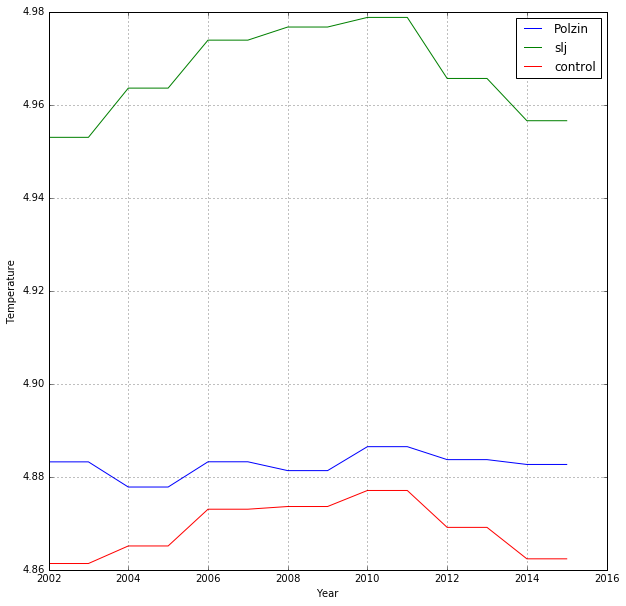

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#cmap = plt.get_cmap('jet')
#cmap.set_bad('burlywood')
x=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']
mesh = ax.plot(x,p,label='Polzin')
mesh = ax.plot(x,sj,label='slj')
mesh = ax.plot(x,c,label='control')
plt.legend(loc='best')

#cbar = fig.colorbar(mesh,ax=ax)
#plt.axis((0, bathy.shape[1], 0, bathy.shape[0]))
ax.grid()

ax.set_xlabel('Year')
ax.set_ylabel('Temperature')


In [9]:
p_glob_avg = np.zeros((168))
var='votemper'
filename = glob.glob(polzin+'avg_GridT_y20??_m??.nc')
for f in np.arange(0,len(filename)):
    theVar = ma.array(nc.Dataset(filename[f]).variables[var],mask=(mask-1)*-1)
    #print(ma.mean(theVar))
    print(f)
    p_glob_avg[f]= np.average(theVar,weights=volume)
    print(p_glob_avg[f])
    
sj_glob_avg = np.zeros((168))
filename = glob.glob(stlandj+'avg_GridT_y20??_m??.nc')
for f in np.arange(0,len(filename)):
    theVar = ma.array(nc.Dataset(filename[f]).variables[var],mask=(mask-1)*-1)
    print(f)
    sj_glob_avg[f]= np.average(theVar,weights=volume)
    print(sj_glob_avg[f])
    
c_glob_avg = np.zeros((168))
filename = glob.glob(control_storage+'avg_GridT_y20??_m??.nc')
for f in np.arange(0,len(filename)):
    theVar = ma.array(nc.Dataset(filename[f]).variables[var],mask=(mask-1)*-1)
    print(f)
    c_glob_avg[f]= np.average(theVar,weights=volume)
    print(c_glob_avg[f])    
#4.80616783985

0
4.80616783985
1
4.91783514005
2
4.81829275186
3
4.77289093335
4
4.80343965127
5
4.81045080175
6
5.07766797726
7
5.04153991695
8
4.7971985335
9
4.75356111089
10
4.76214732754
11
4.97606731997
12
4.81812893435
13
4.78542215945
14
4.82939169759
15
4.96876717913
16
4.91224566018
17
4.77646314549
18
4.9593905794
19
4.87764160801
20
5.01296301748
21
4.95451048613
22
4.95466296024
23
5.03544203062
24
5.00140834969
25
4.91636488057
26
5.04469290379
27
5.07793124091
28
4.7672409522
29
5.08963370123
30
4.78495125213
31
5.02990414168
32
4.78289535349
33
5.07234482987
34
4.99875254364
35
5.07607460905
36
4.82597886831
37
4.98547761164
38
4.7401336021
39
4.92717569549
40
4.79014988303
41
4.91029617782
42
4.95355365365
43
4.88525443843
44
4.76757749756
45
4.79557213591
46
4.78543583359
47
4.77494078358
48
4.92763431681
49
4.82537020386
50
4.77375419922
51
4.81675522724
52
4.82038700622
53
5.01733175377
54
4.97595681696
55
4.79836437847
56
5.02375169059
57
4.79358121494
58
5.00160856409
59
5.025912

In [9]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
p = moving_average(p_yr_avg,3)
sj = moving_average(sj_yr_avg,3)
c = moving_average(c_yr_avg,3)

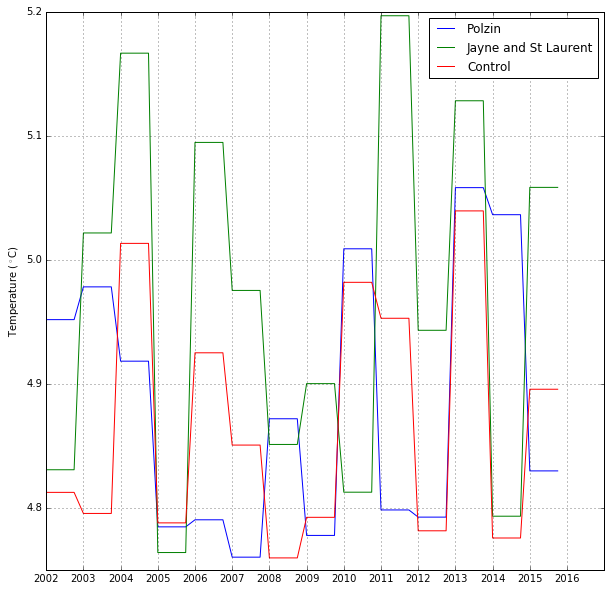

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#cmap = plt.get_cmap('jet')
#cmap.set_bad('burlywood')
#ax.set_xticks([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168])

mesh = ax.plot(p,label='Polzin')
mesh = ax.plot(sj,label='Jayne and St Laurent')
mesh = ax.plot(c,label='Control')
# mesh = ax.plot(p_yr_avg,'bo',label='Polzin')
# ax.plot(p_year_mean,'go',label='Polzin2')
#mesh = ax.plot(sj_yr_avg,'go',label='slj')
#mesh = ax.plot(c_yr_avg,'ro',label='control')
plt.legend(loc='best')
#ax.set_xticklabels=(['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'])
#cbar = fig.colorbar(mesh,ax=ax)
#plt.axis((0, bathy.shape[1], 0, bathy.shape[0]))
ax.grid()
plt.xticks([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180],['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])
#ax.set_xlabel('Year')
ax.set_ylabel('Temperature ($^\circ$C)')

In [27]:
sj_var = np.var(sj_glob_avg)
p_var = np.var(p_glob_avg)
c_var = np.var(c_glob_avg)
print(sj_var,p_var,c_var)

0.0208200176058 0.011320809414 0.00952429973418


In [14]:
p_year_mean = np.zeros((168))
for k in range(0,14):
    l = np.sum(p_yr_avg[k*12:k*12+12])
    print(k*12)
    p_year_mean[k*12:k*12+12] = l/12

0
12
24
36
48
60
72
84
96
108
120
132
144
156


In [67]:
p_year_mean[-12:]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])